In [1]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

plt.set_cmap(plt.cm.gist_ncar)


data = load_iris()


<Figure size 432x288 with 0 Axes>

In [2]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
X = data.data
y = data.target

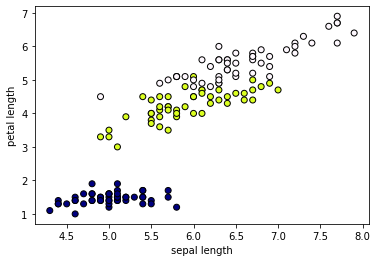

In [7]:
plt.scatter(X[:,0], X[:,2], c=y, edgecolors='k')
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.savefig("first.png")

In [8]:
X = X[:,0::2]

In [9]:

def plotBoundary(X, clf, mesh=True, cmap=plt.get_cmap()):
    x_min = min(X[:, 0])
    x_max = max(X[:, 0])
    y_min = min(X[:, 1])
    y_max = max(X[:, 1])

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]

    z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    z = z.reshape(XX.shape)

    if mesh:
        plt.pcolormesh(XX, YY, z, zorder=-10, cmap=cmap)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)


In [10]:



from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=1)

clf.fit(X, y)


KNeighborsClassifier(n_neighbors=1)

<ipython-input-9-d1862d1897fc>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, z, zorder=-10, cmap=cmap)


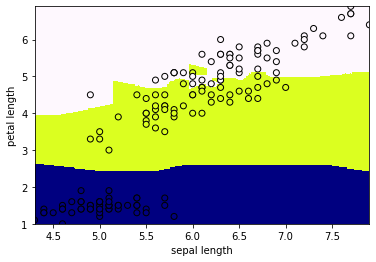

In [12]:
plt.scatter(X[:,0], X[:,1], marker='o', edgecolors='k', c=y)
plotBoundary(X, clf)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.savefig('momo2.png')


In [8]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target


from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2, random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

 



In [9]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
clf.score(X_train, y_train)


1.0

In [11]:
clf.score(X_test, y_test)


0.9122807017543859

In [13]:
 n_range = range(1,20)
 scores = []

 for n in n_range:
     clf.n_neighbors = n
     score = clf.score(X_test, y_test)
     print(n ,score)
     scores.append(score)
scores = np.array(scores)


1 0.9122807017543859
2 0.8947368421052632
3 0.9122807017543859
4 0.9210526315789473
5 0.9385964912280702
6 0.9385964912280702
7 0.9473684210526315
8 0.9473684210526315
9 0.9649122807017544
10 0.9473684210526315
11 0.9649122807017544
12 0.9649122807017544
13 0.9649122807017544
14 0.9649122807017544
15 0.9649122807017544
16 0.9649122807017544
17 0.9649122807017544
18 0.9649122807017544
19 0.9649122807017544


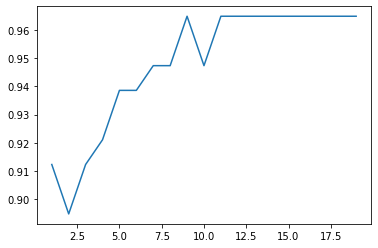

In [16]:
plt.plot(n_range, scores)

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

clf = neighbors.KNeighborsClassifier(n_neighbors=1)


1 0.8947368421052632
2 0.8771929824561403
3 0.9210526315789473
4 0.9035087719298246
5 0.9385964912280702
6 0.9122807017543859
7 0.9385964912280702
8 0.9210526315789473
9 0.9473684210526315
10 0.9298245614035088
11 0.9385964912280702
12 0.9298245614035088
13 0.9385964912280702
14 0.9385964912280702
15 0.956140350877193
16 0.956140350877193
17 0.956140350877193
18 0.9473684210526315
19 0.9385964912280702


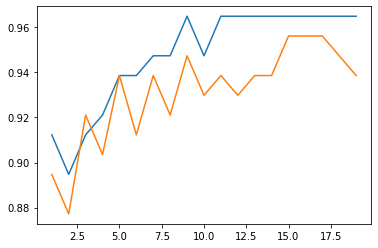

In [21]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
scores2 = []

clf.fit(X_train_scale, y_train)


for n in n_range:
    clf.n_neighbors = n
    score = clf.score(X_test_scale, y_test)
    print(n, score)
    scores2.append(score)

scores2 = np.array(scores2)

plt.plot(n_range, scores)
plt.plot(n_range, scores2)
